In [1]:
import torch 
from torch import nn, optim

import torchvision # torchvision contains many popular datasets, one of which is the MNIST dataset
import torchvision.transforms as transforms

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

from time import time

In [2]:
## Loading the training and test data sets. 

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])  # used to transform the data to the right size
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                      download=True, transform=transform) # get the training data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) 


testset = torchvision.datasets.MNIST(root='./data', train=False, 
                                     download=True, transform=transform) # get the test data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([1, 8, 0, 7, 8, 4, 2, 1, 0, 4, 1, 3, 5, 9, 3, 1, 6, 6, 2, 9, 5, 8, 9, 3,
        1, 5, 2, 9, 7, 6, 6, 3, 2, 1, 4, 5, 0, 6, 0, 1, 5, 5, 9, 3, 1, 5, 1, 8,
        8, 9, 3, 1, 8, 7, 2, 2, 7, 8, 1, 7, 0, 5, 4, 4])


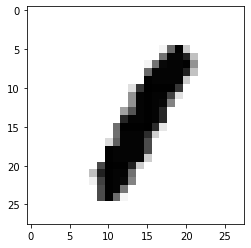

In [9]:
dataiter = iter(trainloader) 
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r') # prints an image from the dataset

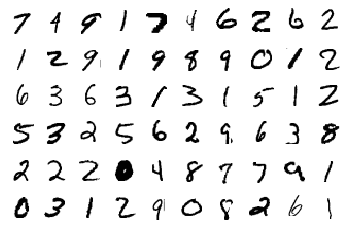

In [4]:
# Printing a grid of images for more examples

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [5]:
## The neural network being used in this example

class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):  # initializes the layers and activation function used
        super(NeuralNet, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):  # the forward propogation method of the net
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        
        return output

In [6]:
## Declaring hyperparameters for the network

input_size = 784  # MNIST pixel size is 28x28 = 784
hidden_size = 500  
output_size = 10  # classifying digits from 0-9, so 10 possible outputs
num_epochs = 5  

learning_rate = 0.001  # alpha; from the equation

## Instantiate the model, loss function, and optimizer being used
model = NeuralNet(input_size, hidden_size, output_size)

lossFunction = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [7]:
## Training the neural net by running the training data/images through it

for epoch in range(num_epochs):
    running_loss = 0
    
    for i, (images,labels) in enumerate(trainloader):
        # Flatten MNIST images into a 784 long vector
        images = images.reshape(-1,28*28)
        
        # Training pass, so zeros the gradient
        optimizer.zero_grad() 
        
        out = model(images) # runs model.forward (forward propogation) on the image
        loss = lossFunction(out,labels) # calculate the loss
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # Optimizes its weights/biases here
        optimizer.step()
        
        running_loss += loss.item()
        
    print('Epoch: %d | loss: %.3f' % (epoch + 1, running_loss / 5000)) # print each epoch's loss
        

Epoch: 1 | loss: 0.058
Epoch: 2 | loss: 0.026
Epoch: 3 | loss: 0.020
Epoch: 4 | loss: 0.016
Epoch: 5 | loss: 0.014


In [8]:
## Testing the neural network using the predetermined test set images

correct = 0
total = 0

with torch.no_grad(): # dont want to be able to alter weights/biases
    
    for images,labels in testloader:
        images = images.reshape(-1,28*28)
        
        out = model(images) 
        _,predicted = torch.max(out.data,1)
        
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.55 %
